### Notebook for running pipeline in Colab

If you're running on colab: run these cells first!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/BEP/git/GPT-DT
!git status
!git pull
# Choose branch name here:
!git checkout evaluation-loop

In [ ]:
%pip install -r requirements-colab.txt

In [ ]:
# CLICK RESTART RUNTIME AND THEN RUN THIS CELL
%cd /content/drive/MyDrive/BEP/git/GPT-DT

### Main Code

In [1]:
%matplotlib inline
from main import *

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\Martijn\miniconda3\envs\BEP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5  2023-5-25 Python-3.9.16 torch-2.0.0 CPU



'utf-8' codec can't decode byte 0xff in position 0: invalid start byte


Fusing layers... 
Model summary: 476 layers, 76226352 parameters, 0 gradients, 110.1 GFLOPs
Adding AutoShape... 
Using cache found in C:\Users\Martijn/.cache\torch\hub\isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in C:\Users\Martijn/.cache\torch\hub\intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


In [2]:
image = "vraag 42.jpg"
prompt, response, car_speed = run_program(image)


image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\Vraag 42.jpg: 480x640 1 outside-view, 1 speed, 170.9ms
Speed: 0.0ms preprocess, 170.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a urban road at 30 km/h. The weather condition is overcast weather.
        This is your front view; You see the following cars: A car approaching from 4.0 meters infront of you and to your right. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: there are no more objects than the ones mentioned above.
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
        
        Letter:
 B
Reasoning: Si

In [ ]:
print(response)

In [2]:
truth = pd.read_csv("ground-truth.csv")
results = truth.copy(deep = True)
results["Answer(word)"] = None
results["Answer(letter)"] = None
results["Speed"] = None

In [3]:
from sklearn import metrics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
%%capture
# len(truth.index)

for row in range(len(truth.index)):
    tru_row = truth.loc[row]
    res_row = results.loc[row]

    image = tru_row["Filename"]
    prompt, response, car_speed = run_program(image)
    resp_char = response.strip(' \n\t')[0]

    if resp_char == 'A':
        resp_word = "Brake"
    elif resp_char == 'B':
        resp_word = "Release Accelerator"
    elif resp_char == 'C':
        resp_word = "Nothing"
    else:
        resp_word = "unknown"

    res_row["Answer(letter)"] = resp_char
    res_row["Speed"] = car_speed
    res_row["Answer(word)"] = resp_word


image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 1.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 219.4ms
Speed: 6.0ms preprocess, 219.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 2.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 132.5ms
Speed: 0.0ms preprocess, 132.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 3.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 121.5ms
Speed: 0.0ms preprocess, 121.5ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 4.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 128.4ms
Speed: 2.5ms preprocess, 128.4ms inference, 0.0ms postpr

In [5]:
confu = metrics.confusion_matrix(truth[["Answer(letter)"]], results[["Answer(letter)"]])
score = metrics.accuracy_score(truth[["Answer(letter)"]], results[["Answer(letter)"]])


In [6]:
results

,Filename,Answer(letter),Answer(word),Speed
0,vraag 1.jpg,B,Release Accelerator,40
1,vraag 2.jpg,A,Brake,80
2,vraag 3.jpg,A,Brake,25
3,vraag 4.jpg,A,Brake,40
4,vraag 5.jpg,A,Brake,30
5,vraag 6.jpg,C,Nothing,40
6,vraag 7.jpg,B,Release Accelerator,100
7,vraag 8.jpg,B,Release Accelerator,30
8,vraag 9.jpg,A,Brake,100
9,vraag 10.jpg,C,Nothing,30


0.3508771929824561


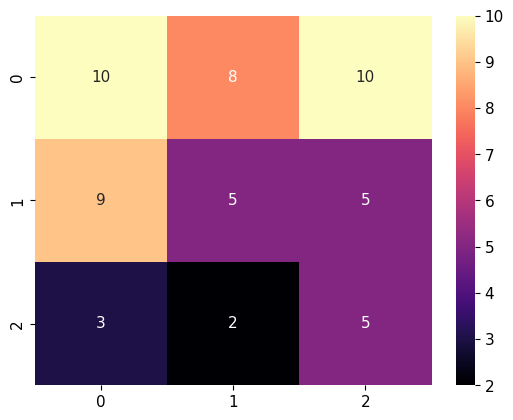

In [7]:
sns.heatmap(confu, annot=True, cmap='magma')
print(score)
plt.show()

In [8]:
df_speed_dif = results[["Speed"]].replace('unknown', 0).astype(float) - truth[["Speed"]].astype(float)
accuracy = len(df_speed_dif[df_speed_dif['Speed'] != 0])/len(truth)
print((1-accuracy))

0.9298245614035088


In [9]:
results.to_csv("results-gpt-3.5-2.csv")

In [27]:
df_adjusted = pd.read_csv("results-gpt-3.5-adjusted.csv")
df_adjusted.head()

,sep=;
0,Filename;Answer(letter);Answer(word);Speed
1,vraag 1.jpg;B;Release Accelerator;40
2,vraag 2.jpg;A;Brake;80
3,vraag 3.jpg;B;Brake;25
4,vraag 4.jpg;A;Brake;40


In [17]:
df_run_1 = pd.read_csv("results-gpt-3.5.csv")
df_run_2 = pd.read_csv("results-gpt-3.5-2.csv")
df_merged = pd.merge(df_run_1, df_run_2)
df_merged = df_merged.drop_duplicates(keep=False)
df_merged

,Unnamed: 0,Filename,Answer(letter),Answer(word),Speed
0,0,vraag 1.jpg,B,Release Accelerator,40
1,1,vraag 2.jpg,A,Brake,80
2,2,vraag 3.jpg,A,Brake,25
3,3,vraag 4.jpg,A,Brake,40
4,4,vraag 5.jpg,A,Brake,30
5,5,vraag 6.jpg,C,Nothing,40
6,7,vraag 8.jpg,B,Release Accelerator,30
7,8,vraag 9.jpg,A,Brake,100
8,9,vraag 10.jpg,C,Nothing,30
9,10,vraag 11.jpg,C,Nothing,60
